In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dataframe = pd.read_csv("C:\\Users\\scott\\Documents\\Project A Week\\Project-A-Week\\Diabetes Prediction\\Data\\diabetes_prediction_dataset.csv")

In [2]:
dataframe.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
dataframe['gender'].value_counts()
dataframe['smoking_history'].value_counts()
dataframe['age'].value_counts() #Need To Remove the 0.48's and the 0.4's 

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [4]:
print(dataframe['age'].value_counts()) #Need To Remove the 0.48's and the 0.4's )

testing = dataframe[dataframe['age'] < 1]
testing['diabetes'].value_counts()

filtered_dataframe = dataframe[dataframe['age']>= 1]

## Tested to see if the outcome of this would effect anything, out of the 911/99999 are values unable to actually be readable 

remade_index_df = filtered_dataframe.reset_index(drop=True)
remade_index_df.head(5)

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
remade_index_df['gender'] = remade_index_df.gender.replace('Female', 0).replace('Male', 1).replace('Other', 2).astype(np.int64)
remade_index_df['smoking_history'] = remade_index_df.gender.replace('No Info', 0).replace('never', 1).replace('former', 2).replace('current', 3).replace('not current', 4).replace('ever', 5).astype(np.int64)
remade_index_df['age'] = remade_index_df.age.astype(np.int64)

In [6]:
dataframe['gender'] = dataframe.gender.replace('Female', 0).replace('Male', 1).replace('Other', 2).astype(np.int64)
dataframe['smoking_history'] = dataframe.gender.replace('No Info', 0).replace('never', 1).replace('former', 2).replace('current', 3).replace('not current', 4).replace('ever', 5).astype(np.int64)
#remade_index_df['age'] = remade_index_df.age.astype(np.int64)

In [7]:
feature_cols = [x for x in dataframe.columns if x not in 'diabetes']

### Diabietes is Our Prediction
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, test_size = 1000, random_state = 42) 

# Get the Index values from generator
train_indx, test_indx = next(strat_shuff_split.split(dataframe[feature_cols], dataframe['diabetes']))

#Create the Datasets 

X_train = dataframe.loc[train_indx, feature_cols]
y_train = dataframe.loc[train_indx, 'diabetes']

X_test = dataframe.loc[test_indx, feature_cols]
y_test = dataframe.loc[test_indx, 'diabetes']


from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state = 42)

dt = dt.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def measure_error(y_true, y_pred, label):
    return pd.Series({
        'accuracy':accuracy_score(y_true,y_pred),
        'precision': precision_score(y_true,y_pred),
        'recall':recall_score(y_true,y_pred),
        'f1': f1_score(y_true, y_pred)},
         name=label
    )
    
y_train_pred =  dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'Train'),
                                   measure_error(y_test, y_test_pred, 'test')], axis = 1)

train_test_full_error


#Results provided the model is overfit to our Training data espeically since we're trying to train the model with no max layer as well as nodes. 


,Train,test
accuracy,0.997859,0.958000
precision,0.999878,0.779221
recall,0.974926,0.705882
f1,0.987244,0.740741


In [8]:
remade_index_df.dtypes

gender                   int64
age                      int64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
feature_cols = [x for x in remade_index_df.columns if x not in 'diabetes']

In [10]:
### Diabietes is Our Prediction
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, test_size = 1000, random_state = 42) 

# Get the Index values from generator
train_indx, test_indx = next(strat_shuff_split.split(remade_index_df[feature_cols], remade_index_df['diabetes']))

#Create the Datasets 

X_train = remade_index_df.loc[train_indx, feature_cols]
y_train = remade_index_df.loc[train_indx, 'diabetes']

X_test = remade_index_df.loc[test_indx, feature_cols]
y_test = remade_index_df.loc[test_indx, 'diabetes']

In [11]:
y_train.value_counts(normalize=True).sort_index()

diabetes
0    0.914221
1    0.085779
Name: proportion, dtype: float64

In [12]:
y_test.value_counts(normalize=True).sort_index()

diabetes
0    0.914
1    0.086
Name: proportion, dtype: float64

In [13]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state = 42)

dt = dt.fit(X_train, y_train)



In [14]:
dt.tree_.node_count, dt.tree_.max_depth

(9229, 35)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def measure_error(y_true, y_pred, label):
    return pd.Series({
        'accuracy':accuracy_score(y_true,y_pred),
        'precision': precision_score(y_true,y_pred),
        'recall':recall_score(y_true,y_pred),
        'f1': f1_score(y_true, y_pred)},
         name=label
    )

In [16]:
y_train_pred =  dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'Train'),
                                   measure_error(y_test, y_test_pred, 'test')], axis = 1)

train_test_full_error


#Results provided the model is overfit to our Training data espeically since we're trying to train the model with no max layer as well as nodes. 


,Train,test
accuracy,0.997839,0.953000
precision,0.999756,0.729412
recall,0.975042,0.720930
f1,0.987244,0.725146


In [18]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': range (1, dt.tree_.max_depth+1, 2),
              'max_features': range(1,len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring ='accuracy',
                  n_jobs=1)

GR = GR.fit(X_train, y_train)

In [19]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(35, 7)

In [20]:
#Grid Search based upon Accuracy - (35, 7)

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr,'test')],axis =1)

train_test_gr_error

,train,test
accuracy,0.971638,0.969000
precision,1.000000,1.000000
recall,0.669361,0.639535
f1,0.801936,0.780142


In [21]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': range (1, dt.tree_.max_depth+1, 2),
              'max_features': range(1,len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring ='f1',
                  n_jobs=1)

GR = GR.fit(X_train, y_train)

In [22]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(87, 9)

In [23]:
#Grid Search based upon F1 - (87, 9)

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr,'test')],axis =1)

train_test_gr_error

,train,test
accuracy,0.971944,0.968000
precision,0.995276,0.982143
recall,0.676135,0.639535
f1,0.805237,0.774648


In [24]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': range (1, dt.tree_.max_depth+1, 2),
              'max_features': range(1,len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring ='recall',
                  n_jobs=1)

GR = GR.fit(X_train, y_train)

In [25]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(9097, 31)

In [26]:
#Grid Search based upon Recall - (87, 9)

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr,'test')],axis =1)

train_test_gr_error

,train,test
accuracy,0.997686,0.947000
precision,0.999268,0.685393
recall,0.973734,0.709302
f1,0.986336,0.697143


In [27]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': range (1, dt.tree_.max_depth+1, 2),
              'max_features': range(1,len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring ='precision',
                  n_jobs=1)

GR = GR.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

In [28]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [ ]:
#Grid Search based upon Precision - (3, 1)

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr,'test')],axis =1)

train_test_gr_error

,train,test
accuracy,0.947344,0.942000
precision,1.000000,1.000000
recall,0.386142,0.325581
f1,0.557147,0.491228


In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

file_name = 'DecisionTreeUnRestrained.png'
graph.write_png(file_name)
Image(file_name)

In [ ]:
#Graph of Descision Data From Grid Search 

dot_data = StringIO()
export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

file_name = 'DecisionTreeGR.png'
graph.write_png(file_name)
Image(file_name)

In [31]:
#Found F1 Score was to low for me to accept the outcome, we would rather have a higher accuracy, but I am using F1 for generalized output optimization 
### Going to See if WE can introduce Random Forests to fix this. 

## Random Forests 


from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,
                            random_state = 42,
                            warm_start = True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15,20,30,40,50,100,150,200,300,400,500,600,700]:
    
    RF.set_params(n_estimators= n_trees)
    RF.fit(X_train, y_train)
    oob_error =1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob':oob_error}))
    
rf_oob_df = pd.concat(oob_list, axis =1).T.set_index('n_trees')

rf_oob_df


c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.034489
20.0,0.033990
30.0,0.033276
40.0,0.032899
50.0,0.033011
100.0,0.032297
150.0,0.032124
200.0,0.031981
300.0,0.031859


In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

[Text(0, 0.5, 'out of bag error')]

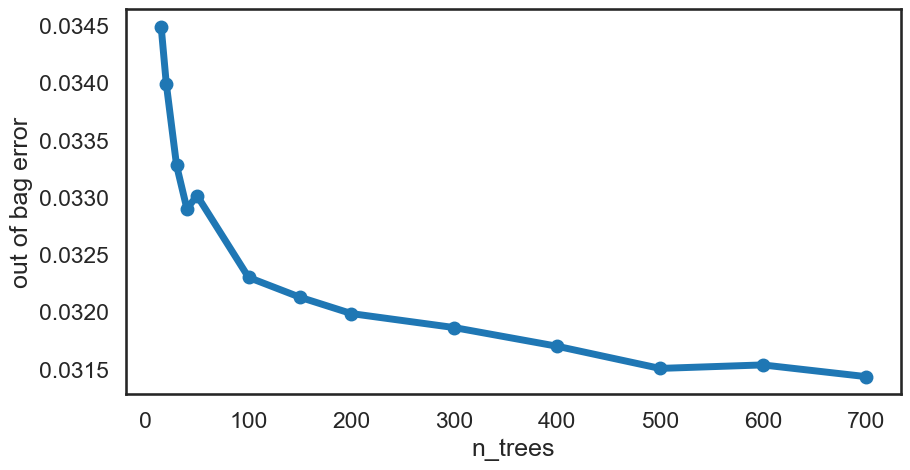

In [36]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker ='o', figsize = (10,5), linewidth = 5)
ax.set(ylabel = 'out of bag error')

In [ ]:
RF = RandomForestClassifier(oob_score=True,
                            random_state = 42,
                            warm_start = True,
                            n_jobs=-1)

RF.set_params(n_estimators= 200)

RF = RF.fit(X_train, y_train)

y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_test)

train_test_RF_error = pd.concat([measure_error(y_train, y_train_pred_RF, 'train'),
                                 measure_error(y_test, y_test_pred_RF,'test')],axis =1)

print(train_test_RF_error)



              train      test
accuracy   0.997839  0.969000
precision  0.998784  0.966102
recall     0.975992  0.662791
f1         0.987257  0.786207


In [49]:
### For ExtraTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier

EF = ExtraTreesClassifier(oob_score =True,
                          random_state = 42,
                          warm_start = True,
                          bootstrap = True,
                          n_jobs = -1)

oob_list = list()

for n_trees in [15,20,30,40,50,100,150,200,300,400,500,600,700]:
    
    EF.set_params(n_estimators= n_trees)
    EF.fit(X_train, y_train)
    oob_error =1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob':oob_error}))
    
ef_oob_df = pd.concat(oob_list, axis =1).T.set_index('n_trees')

ef_oob_df


c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.037089
20.0,0.035753
30.0,0.034357
40.0,0.033541
50.0,0.033256
100.0,0.032328
150.0,0.031910
200.0,0.031859
300.0,0.031818


[Text(0, 0.5, 'out of bag error')]

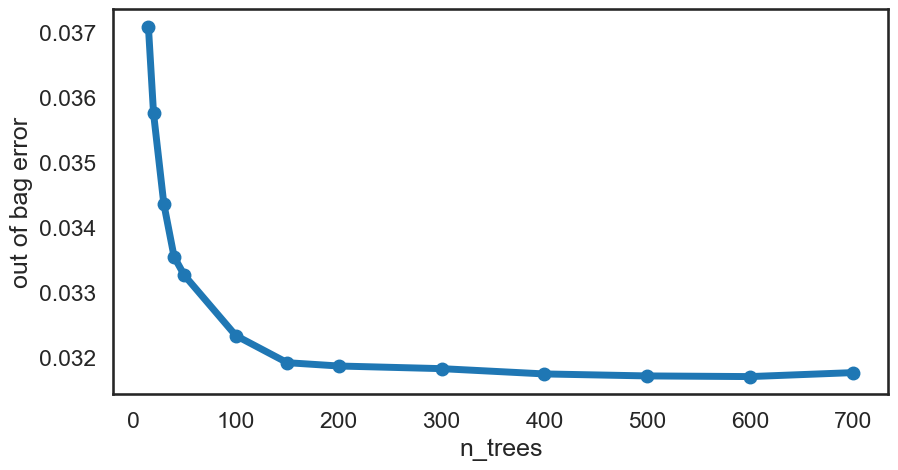

In [50]:
sns.set_context('talk')
sns.set_style('white')

ax = ef_oob_df.plot(legend=False, marker ='o', figsize = (10,5), linewidth = 5)
ax.set(ylabel = 'out of bag error')

In [52]:
#Chose Number 150 

EF = ExtraTreesClassifier(oob_score =True,
                          random_state = 42,
                          warm_start = True,
                          bootstrap = True,
                          n_jobs = -1)

EF.set_params(n_estimators= 150)


EF = EF.fit(X_train, y_train)

y_train_pred_EF = EF.predict(X_train)
y_test_pred_EF = EF.predict(X_test)

train_test_EF_error = pd.concat([measure_error(y_train, y_train_pred_EF, 'train'),
                                 measure_error(y_test, y_test_pred_EF,'test')],axis =1)

print(train_test_EF_error)

              train      test
accuracy   0.997829  0.965000
precision  0.998541  0.918033
recall     0.976111  0.651163
f1         0.987199  0.761905


In [ ]:
# Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

tree_list = [15, 25, 50, 100, 200, 400]

for n_trees in tree_list:
    
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
    
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)
    
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    error_list.append(pd.Series({'n_trees' : n_trees, 'error': error}))

error_df = pd.concat(error_list, axis = 1).T.set_index('n_trees')

error_df


c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn

,error
n_trees,
15.0,0.031
25.0,0.031
50.0,0.031
100.0,0.033
200.0,0.034
400.0,0.034


(0.0, 440.00000000000006)

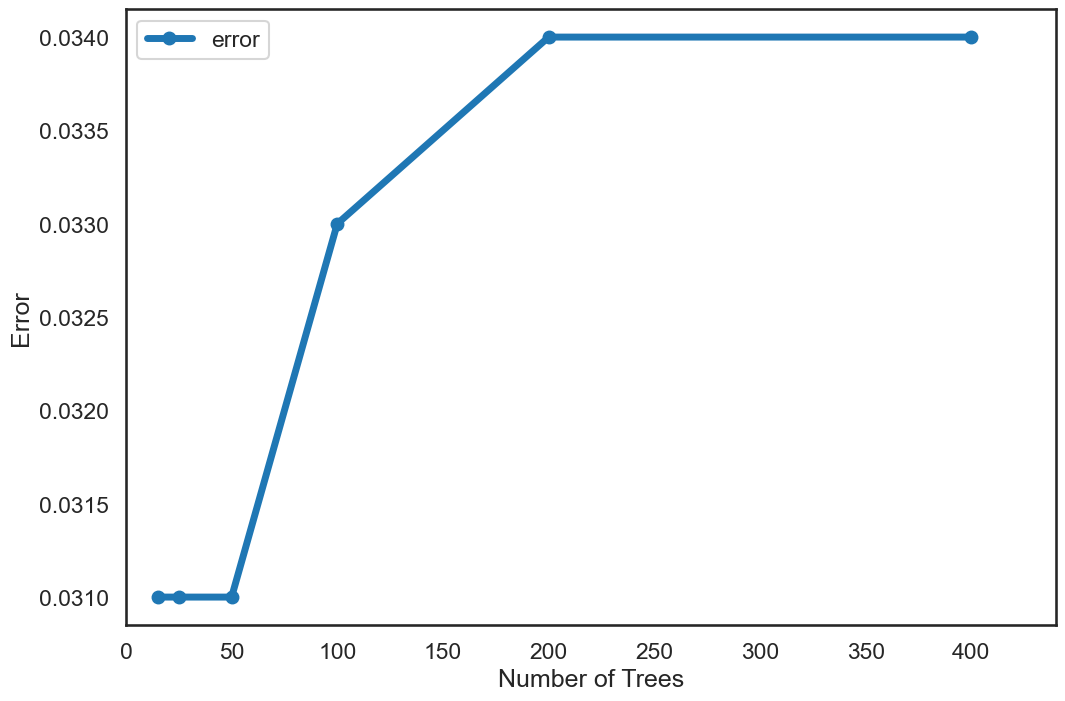

In [64]:
sns.set_context('talk')
sns.set_style('white')
#sns.set_palette(palette)

ax = error_df.plot(marker ='o', figsize = (12,8), linewidth =5)

ax.set(xlabel = 'Number of Trees', ylabel='Error')

ax.set_xlim(0, max(error_df.index) * 1.1)

In [77]:
# Hyper Paramater Tuning Gradient Boosting 

param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.75, 0.5, 0.25]}


CV_GB = GridSearchCV(GradientBoostingClassifier(n_estimators = 50, random_state = 42),
                     param_grid = param_grid,
                     scoring = 'accuracy',
                     n_jobs = -1)

CV_GB = CV_GB.fit(X_train, y_train)



In [78]:
print(CV_GB.best_estimator_.learning_rate)
print(CV_GB.best_estimator_)

0.1
GradientBoostingClassifier(n_estimators=50, random_state=42, subsample=0.25)


In [ ]:
from sklearn.metrics import classification_report 
CV_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, subsample=0.25, random_state= 42)
CV_GB = CV_GB.fit(X_train, y_train)

y_pred = CV_GB.predict(X_test)
print(classification_report(y_test, y_pred))

y_train_pred_CV_GB = CV_GB.predict(X_train)
y_test_pred_CV_GB = CV_GB.predict(X_test)

CV_GB_report = pd.concat([measure_error(y_train, y_train_pred_CV_GB, 'train'),
                                 measure_error(y_test, y_test_pred_CV_GB,'test')],axis =1)
print(CV_GB_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       914
           1       1.00      0.64      0.78        86

    accuracy                           0.97      1000
   macro avg       0.98      0.82      0.88      1000
weighted avg       0.97      0.97      0.97      1000

              train      test
accuracy   0.971730  0.969000
precision  0.996829  1.000000
recall     0.672570  0.639535
f1         0.803208  0.780142


In [83]:
print(classification_report(y_test, y_test_pred_CV_GB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       914
           1       1.00      0.64      0.78        86

    accuracy                           0.97      1000
   macro avg       0.98      0.82      0.88      1000
weighted avg       0.97      0.97      0.97      1000



In [84]:
print(classification_report(y_train, y_train_pred_CV_GB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     89675
           1       1.00      0.67      0.80      8414

    accuracy                           0.97     98089
   macro avg       0.98      0.84      0.89     98089
weighted avg       0.97      0.97      0.97     98089



In [81]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       945
           1       0.64      1.00      0.78        55

    accuracy                           0.97      1000
   macro avg       0.82      0.98      0.88      1000
weighted avg       0.98      0.97      0.97      1000



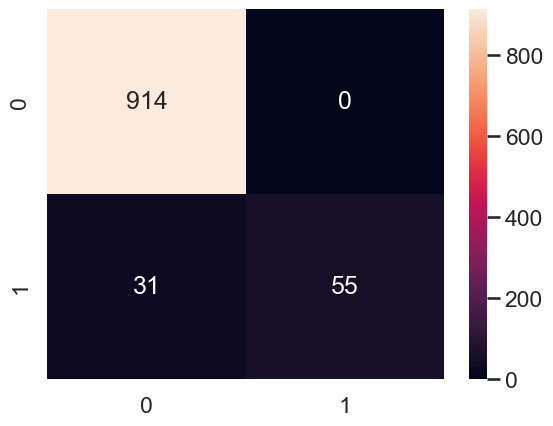

In [74]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [85]:
# Final Selection of Model 

RF = RandomForestClassifier(oob_score=True,
                            random_state = 42,
                            warm_start = True,
                            n_jobs=-1)

RF.set_params(n_estimators= 200)

RF = RF.fit(X_train, y_train)

y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_test)

train_test_RF_error = pd.concat([measure_error(y_train, y_train_pred_RF, 'train'),
                                 measure_error(y_test, y_test_pred_RF,'test')],axis =1)

print(train_test_RF_error)


              train      test
accuracy   0.997839  0.969000
precision  0.998784  0.966102
recall     0.975992  0.662791
f1         0.987257  0.786207


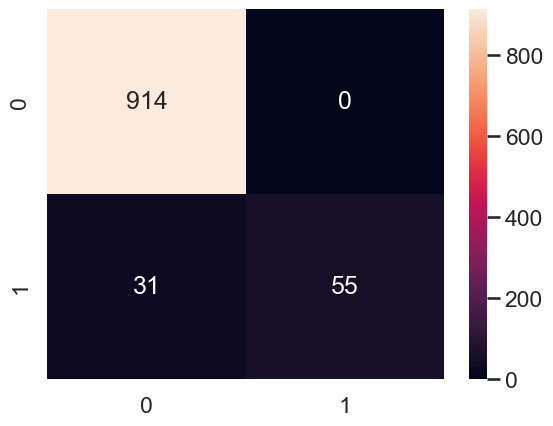

In [ ]:
#Confusion Matrix 

sns.set_context('talk')
final_matrix = confusion_matrix(y_test, y_test_pred_RF)
ax = sns.heatmap(cm, annot=True, fmt='d')

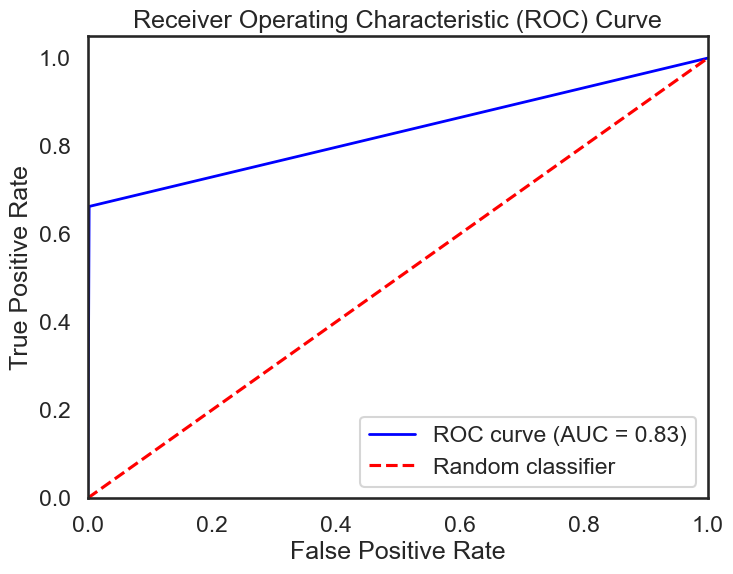

In [88]:
# ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score 

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_RF)
auc = roc_auc_score (y_test, y_test_pred_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()